<style>
.brown {
    color: #9c6644;
    font-weight:700;
    font-size: 40px;
    text-align: button;
    padding: 0;
    margin: 0;
}
</style>
<style>
.light-brown {
    color: #a78a7f;
    font-weight:700;
    font-size: 25px;
    text-align: top;
    padding: 0;
    margin: 0;
}
</style>
<style>
.linea {
  border-top: 2px solid #9c6644;
  height: 2px;
  max-width: 535px;
  padding: 10;
  margin: 10;
}
</style>
<p class="brown">
    PROJECT MLOps STREAMING
</p>

<div class="linea"></div>

<p class="light-brown">
    DATA VISUALIZATION
</p>

<style>
.light-brown {
    color: #a78a7f;
    font-weight:700;
    font-size: 20px;
    text-align: top;
    padding: 0;
    margin-top: 40px;
}
</style>
<p class="light-brown">
    LOAD THE DATASET
</p>

In [2]:
# Import the libraries.
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('dark_background')
import plotly.express as px
import plotly.io as pio


# Load the dataset.
dfStreamingML = pd.read_parquet('./StreamingML.parquet')

# Visualize the dataset. 
dfStreamingML

,userId,score,id,platform,title,director,cast,country,date_added,release_year,rating,listed_in,duration_int,duration_type
0,1,1.0,as680,amazon prime,the english civil war,no data,robert whelan,no data,NaT,1970,pg-13,"documentary, special interest",1,season
1,583,4.5,as680,amazon prime,the english civil war,no data,robert whelan,no data,NaT,1970,pg-13,"documentary, special interest",1,season
2,765,5.0,as680,amazon prime,the english civil war,no data,robert whelan,no data,NaT,1970,pg-13,"documentary, special interest",1,season
3,2116,3.0,as680,amazon prime,the english civil war,no data,robert whelan,no data,NaT,1970,pg-13,"documentary, special interest",1,season
4,2143,3.0,as680,amazon prime,the english civil war,no data,robert whelan,no data,NaT,1970,pg-13,"documentary, special interest",1,season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11024319,123886,3.5,ns720,netflix,power rangers dino fury,no data,"russell curry, hunter deno, kai moya, tessa ra...",united states,2021-06-15,1970,tv-g,kids' tv,1,season
11024320,123923,3.5,ns720,hulu,mlk/fbi,no data,no data,no data,2021-05-14,1970,tv-g,"black stories, documentaries",106,min
11024321,123923,3.5,ns720,netflix,power rangers dino fury,no data,"russell curry, hunter deno, kai moya, tessa ra...",united states,2021-06-15,1970,tv-g,kids' tv,1,season
11024322,124006,3.0,ns720,hulu,mlk/fbi,no data,no data,no data,2021-05-14,1970,tv-g,"black stories, documentaries",106,min


<style>
.linea {
  border-top: 2px solid #a78a7f;
  height: 2px;
  max-width: 2000px;
  padding: 10;
  margin: 10;
}
</style>
<div class="linea"></div>
<div class="linea"></div>


<style>
.light-brown {
    color: #a78a7f;
    font-weight:700;
    font-size: 20px;
    text-align: top;
    padding: 0;
    margin: 0px;
}
</style>
<p class="light-brown">
    DATA PREPARATION
</p>

In [3]:
# See the size of my dataset.
print('*'*40)
print('')
print('dfStreamingML: rows', dfStreamingML.shape, 'columns.')
print('')
print('*'*40)

****************************************

dfStreamingML: rows (11024324, 14) columns.

****************************************


In [4]:
print('*'*40)
print('')
print(dfStreamingML.dtypes)
print('')
print('*'*40)

****************************************

userId                    int64
score                   float64
id                       object
platform                 object
title                    object
director                 object
cast                     object
country                  object
date_added       datetime64[ns]
release_year              int64
rating                   object
listed_in                object
duration_int              int64
duration_type            object
dtype: object

****************************************


In [5]:
# Check for null or missing values.
print('*'*40)
print('')
print(dfStreamingML.isnull().sum())
print('')
print('*'*40)

****************************************

userId                 0
score                  0
id                     0
platform               0
title                  0
director               0
cast                   0
country                0
date_added       4577425
release_year           0
rating                 0
listed_in              0
duration_int           0
duration_type      89325
dtype: int64

****************************************


In [6]:
# Check for duplicate values.
print('*'*40)
print('')
print('There are:', dfStreamingML.duplicated().sum(),'duplicate values')
print('')
print('*'*40)

****************************************

There are: 28593 duplicate values

****************************************


In [7]:
# Removed duplicate values.
dfStreamingML = dfStreamingML.loc[~dfStreamingML.duplicated(subset=['userId', 
                                                                    'score', 
                                                                    'id', 
                                                                    'platform'])] \
                                                .reset_index(drop=True).copy()

# Display the result.
print('*'*40)
print('')
print('There are:', dfStreamingML.duplicated().sum(),'duplicate values')
print('')
print('*'*40)
dfStreamingML

****************************************

There are: 0 duplicate values

****************************************


,userId,score,id,platform,title,director,cast,country,date_added,release_year,rating,listed_in,duration_int,duration_type
0,1,1.0,as680,amazon prime,the english civil war,no data,robert whelan,no data,NaT,1970,pg-13,"documentary, special interest",1,season
1,583,4.5,as680,amazon prime,the english civil war,no data,robert whelan,no data,NaT,1970,pg-13,"documentary, special interest",1,season
2,765,5.0,as680,amazon prime,the english civil war,no data,robert whelan,no data,NaT,1970,pg-13,"documentary, special interest",1,season
3,2116,3.0,as680,amazon prime,the english civil war,no data,robert whelan,no data,NaT,1970,pg-13,"documentary, special interest",1,season
4,2143,3.0,as680,amazon prime,the english civil war,no data,robert whelan,no data,NaT,1970,pg-13,"documentary, special interest",1,season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995726,123886,3.5,ns720,netflix,power rangers dino fury,no data,"russell curry, hunter deno, kai moya, tessa ra...",united states,2021-06-15,1970,tv-g,kids' tv,1,season
10995727,123923,3.5,ns720,hulu,mlk/fbi,no data,no data,no data,2021-05-14,1970,tv-g,"black stories, documentaries",106,min
10995728,123923,3.5,ns720,netflix,power rangers dino fury,no data,"russell curry, hunter deno, kai moya, tessa ra...",united states,2021-06-15,1970,tv-g,kids' tv,1,season
10995729,124006,3.0,ns720,hulu,mlk/fbi,no data,no data,no data,2021-05-14,1970,tv-g,"black stories, documentaries",106,min


<style>
.linea {
  border-top: 2px solid #a78a7f;
  height: 2px;
  max-width: 2000px;
  padding: 10;
  margin: 10;
}
</style>
<div class="linea"></div>
<div class="linea"></div>

<style>
.light-brown {
    color: #a78a7f;
    font-weight:700;
    font-size: 20px;
    text-align: top;
    padding: 0;
    margin: 0px;
}
</style>
<p class="light-brown">
    FEATURE UNDERSTANDING
</p>

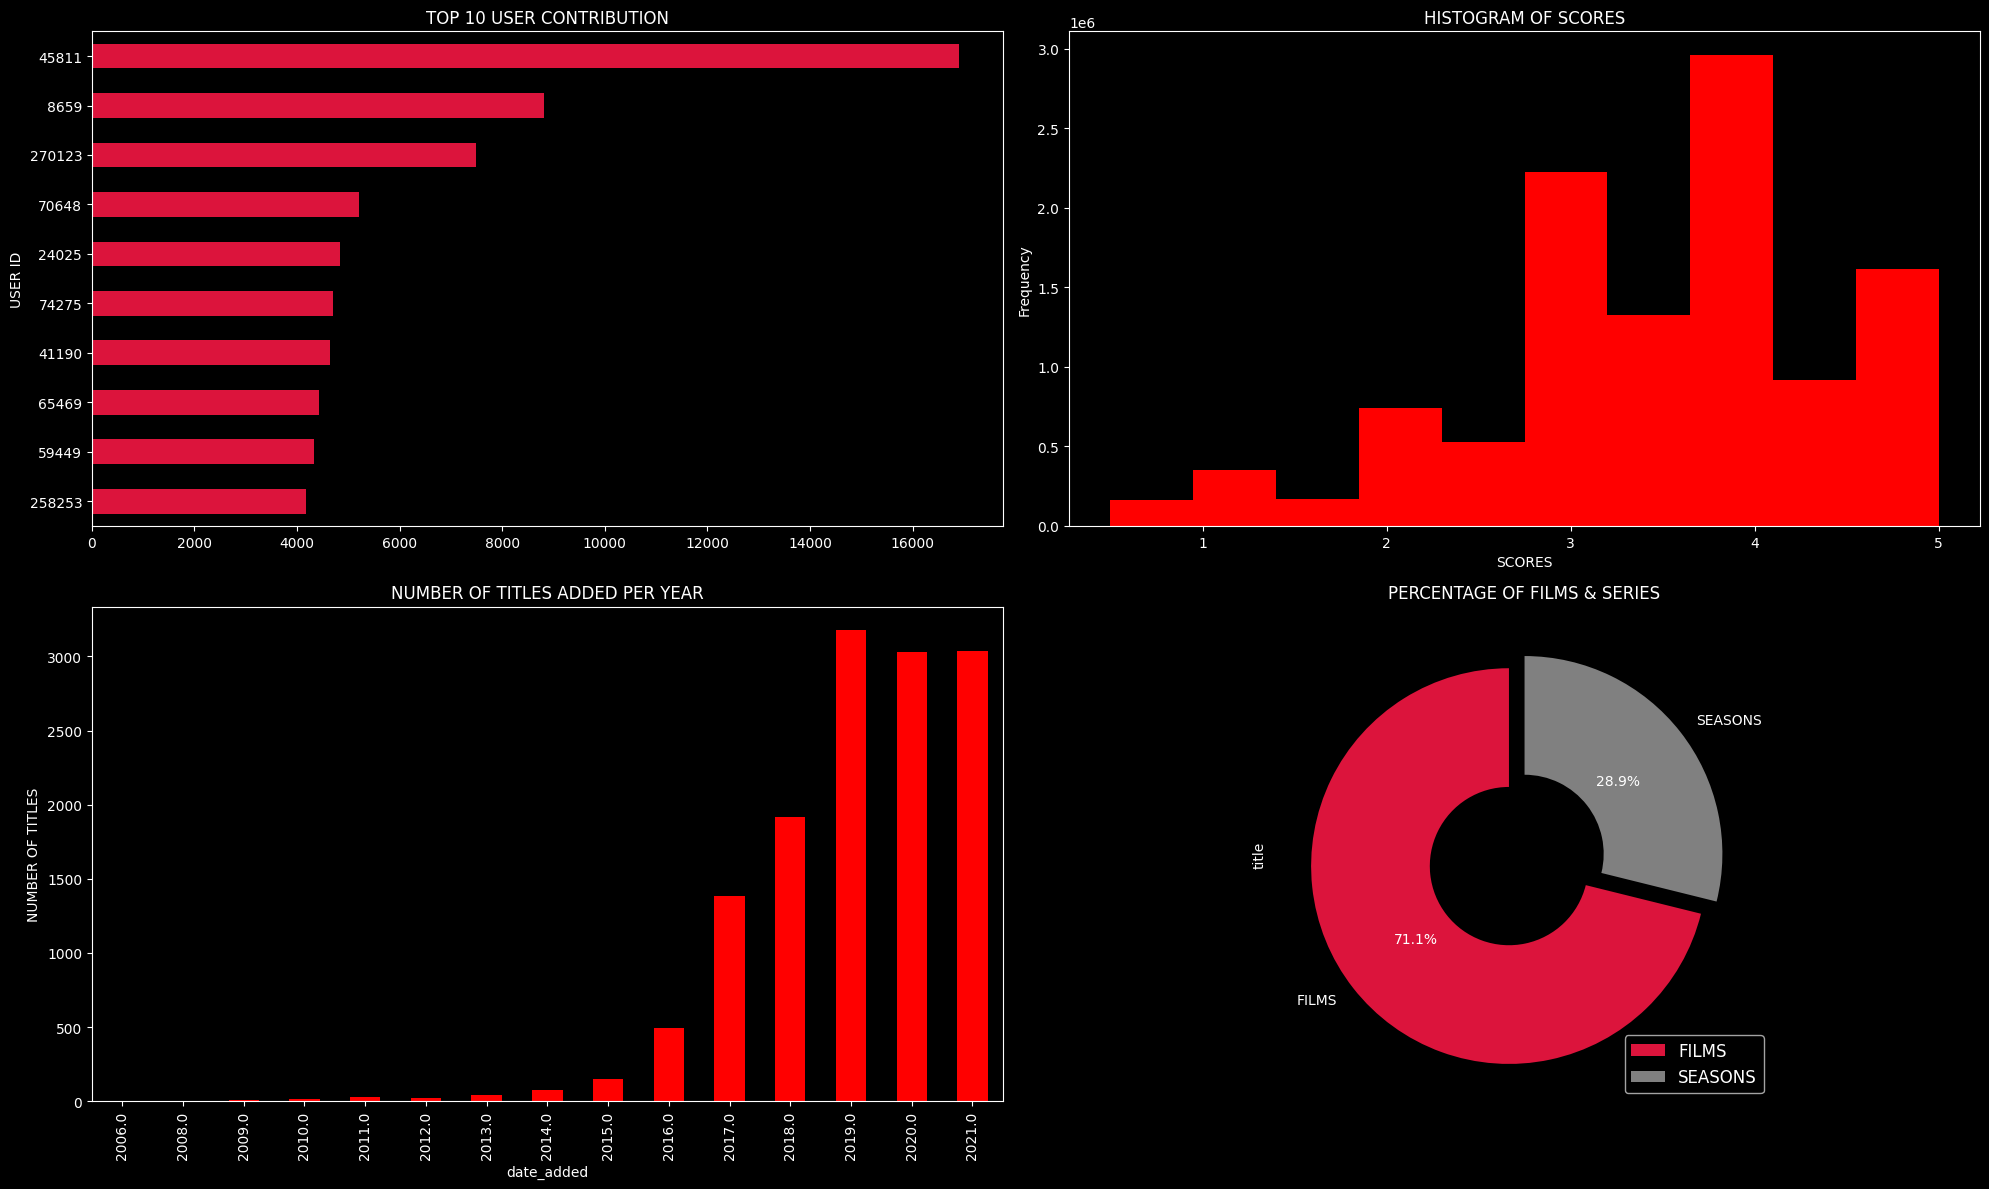

In [8]:
# Created the figure and subplots.
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# FIRST GRAPH: Bar graph with the TOP 10 users who contributed the most to the ratings.
axs[0, 0].set_title('TOP 10 USER CONTRIBUTION')
axs[0, 0].set_xlabel('AMOUNT OF RATINGS')
axs[0, 0].set_ylabel('USER ID')
axs[0, 0].set_facecolor('black')
dfStreamingML['userId'].value_counts() \
    .sort_values(ascending=True) \
    .tail(10) \
    .plot  (kind='barh', 
            color='crimson', 
            ax=axs[0, 0])

# SECOND GRAPH: Histogram with the most frequent values ​​of the scores.
axs[0, 1].set_title('HISTOGRAM OF SCORES')
axs[0, 1].set_xlabel('SCORES')
axs[0, 1].set_ylabel('FREQUENCY')
axs[0, 1].set_facecolor('black')
dfStreamingML['score'].plot(kind='hist', 
                            bins=10, 
                            color='red', 
                            ax=axs[0, 1])

# THIRD GRAPH: Bar graph with the number of titles added per year.
axs[1, 0].set_title('NUMBER OF TITLES ADDED PER YEAR')
axs[1, 0].set_xlabel('YEARS')
axs[1, 0].set_ylabel('NUMBER OF TITLES')
axs[1, 0].set_facecolor('black')
titleCounts = dfStreamingML.groupby(dfStreamingML['date_added'].dt.year)['title'].nunique()
titleCounts.plot   (kind='bar', 
                    color='red', 
                    ax=axs[1, 0])

# FOURTH GRAPH: Percentage of Movies and Series.
axs[1, 1].set_title('PERCENTAGE OF FILMS & SERIES')
axs[1, 1].set_facecolor('black')
percentageFS = dfStreamingML.groupby("duration_type")['title'].count()
labels = ['FILMS', 'SEASONS']
colors = ['crimson', 'gray']
explode = [0.1, 0]
percentageFS.plot  (kind='pie', 
                    labels=labels, 
                    colors=colors, 
                    explode=explode, 
                    autopct='%1.1f%%', 
                    startangle=90, 
                    wedgeprops={'width':0.6},
                    ax=axs[1, 1])
axs[1, 1].legend(loc='lower right', fontsize=12)

plt.tight_layout()
plt.show()


<style>
.linea {
  border-top: 2px solid #a78a7f;
  height: 2px;
  max-width: 2000px;
  padding: 10;
  margin: 10;
}
</style>
<div class="linea"></div>
<div class="linea"></div>

<style>
.light-brown {
    color: #a78a7f;
    font-weight:700;
    font-size: 20px;
    text-align: top;
    padding: 0;
    margin: 0px;
}
</style>
<p class="light-brown">
    FEATURE RELATIONSHIPS
</p>

In [9]:
# Create the color palette for the graphics by platform.
colorPlatform = {   'amazon prime': 'aqua',
                    'disney plus': 'royalblue',
                    'hulu': 'springgreen',
                    'netflix': 'brown'}

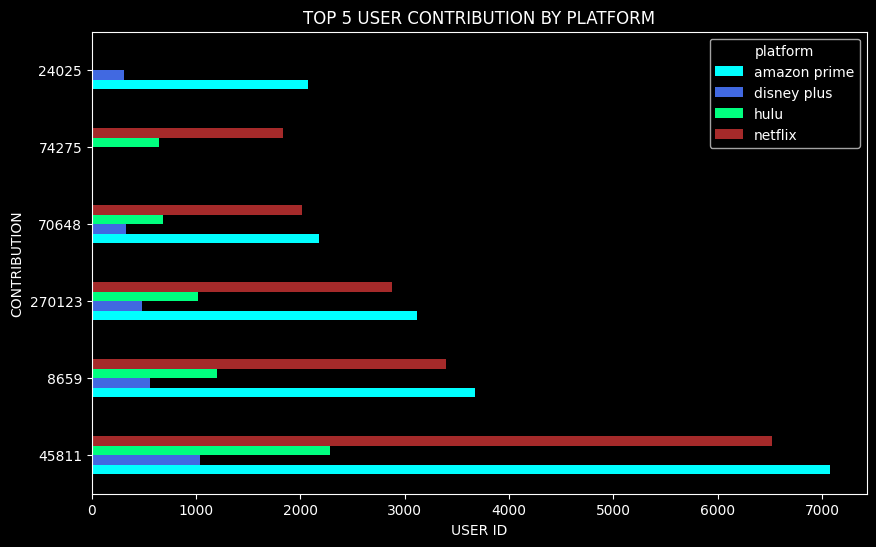

In [41]:
# I make a dataframe with the UserID and Platform columns.
dfUserPlatform = pd.DataFrame({ 'userId': dfStreamingML['userId'], 
                                'platform': dfStreamingML['platform']})

# Group the created dataframe, and count the number of occurrences.
grouped = dfUserPlatform.groupby(['platform', 'userId']) \
                        .size() \
                        .reset_index(name='Amount of Ratings')

# Regroup the result by Platform and take only the 5 with the greatest contribution.
topUsers =   grouped.groupby('platform')['Amount of Ratings'] \
                    .nlargest(5)

# Select only the rows corresponding to the top 5 users of each platform.
dfTop = grouped.loc[topUsers.index.get_level_values(1)]

# Create a pivot table with "userId" as index, "platform" as columns and "Amount of Ratings" as values.
dfPivot = dfTop.pivot_table(index='userId', 
                            columns='platform', 
                            values='Amount of Ratings', 
                            fill_value=0)

# Sort the pivot table rows by the total number of contributions from each user.
userSum =  dfTop.groupby('userId')['Amount of Ratings'] \
                .sum() \
                .sort_values(ascending=False)
dfPivot = dfPivot.reindex(index=userSum.index)

# BAR GRAPH: WITH THE 5 USERS THAT MADE THE GREATEST CONTRIBUTION ON EACH PLATFORM.
ax1 = dfPivot.plot( kind='barh',
                    stacked=False,
                    title='TOP 5 USER CONTRIBUTION BY PLATFORM',
                    color=colorPlatform,
                    figsize=(10, 6))
ax1.set_xlabel('USER ID')
ax1.set_ylabel('CONTRIBUTION')
plt.show()


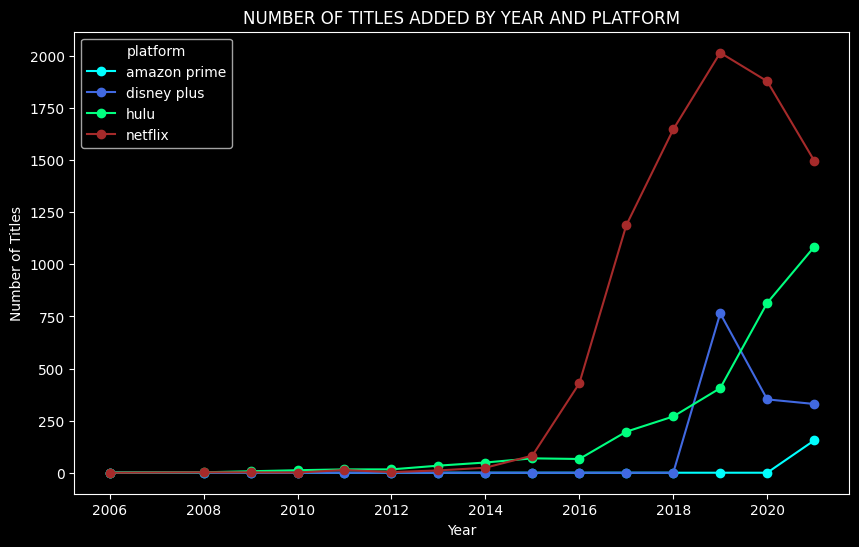

In [40]:
# Group the data by the year of release and the platform. And counted the number of unique movies added in each year.
titleAddeds =  dfStreamingML.groupby([dfStreamingML['date_added'].dt.year, 'platform'])['title'] \
                            .nunique() \
                            .unstack() \
                            .fillna(0)

# LINE GRAPH: TITLES ADDED TO THE PLATFORMS IN EACH YEAR.
ax2 = titleAddeds.plot( kind= 'line', 
                        marker='o', 
                        color= colorPlatform,
                        title= 'NUMBER OF TITLES ADDED BY YEAR AND PLATFORM',
                        figsize=(10, 6))
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Titles')
plt.show()

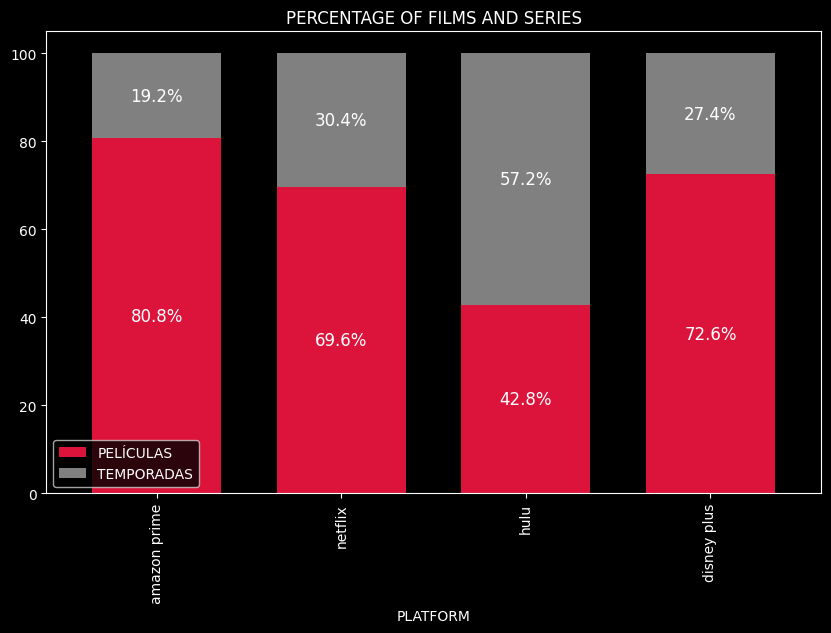

In [42]:
# I group the data, to count the titles of each platform and see which are Movies or TvShow
grouped =  dfStreamingML.groupby(['platform', 'duration_type'])['title'] \
                        .count() \
                        .unstack()

# Order the rows by the sum of the values ​​of the columns in descending order.
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]

# Calculate the percentage of each value in the rows.
grouped = grouped.apply(lambda x: x / x.sum() * 100, axis=1)

# STACKED BAR CHART: WITH THE PERCENTAGE OF FILMS AND SERIES BY PLATFORM.
ax3 = grouped.plot(     kind='bar', 
                        stacked=True, 
                        width=0.7, 
                        color=['crimson', 'gray'],
                        title= 'PERCENTAGE OF FILMS AND SERIES',
                        figsize=(10, 6))
ax3.set_xlabel('PLATFORM')
ax3.legend( labels=['PELÍCULAS', 'TEMPORADAS'], 
            loc='lower left')

# Add value labels to each bar.
for i, platform in enumerate(grouped.index):
    offset = 0
    for j, duration_type in enumerate(grouped.columns):
        value = grouped.loc[platform, duration_type]
        ax3.text(i, offset + value/2, f'{value:.1f}%', 
                ha='center', 
                va='center', 
                fontsize=12)
        offset += value
plt.show()

In [43]:
# Calculate the average score by title and platform.
dfAvgScore = dfStreamingML.groupby(['platform', 'title'])['score'].mean().reset_index()

# Find the title with the highest average score by platform.
idx = dfAvgScore.groupby(['platform'])['score'].transform(max) == dfAvgScore['score']
dfMaxScore = dfAvgScore[idx]

# Created the KPI cards using plotly
fig2 = px.bar(dfMaxScore,   x='platform', 
                            y='score', 
                            color='title',
                            title='TITLE WITH THE HIGHEST AVERAGE SCORE BY PLATFORM',
                            labels={'platform': 'PLATFORM', 'score': 'AVERAGE', 'title': 'TITLE'},
                            color_discrete_sequence=[colorPlatform[p] for p in dfMaxScore['platform']])

# Change the background to black for the graph.
fig2.update_layout(template="plotly_dark")
pio.templates.default = "plotly_dark"
fig2.show()


<style>
.light-brown {
    color: #463f3a;
    font-weight:700;
    font-size: 20px;
    vertical-align: middle;
    text-align: right;
    padding: 0px;
    margin: 0px 0px 20px 0px;
}
</style>
<style>
.linea {
  border-top: 0.5px solid #463f3a;
  height: 1px;
  max-width: 2000px;
  padding: 0;
  margin: 0;
}
</style>
<div class="linea"></div>
<p class="light-brown">
    Project carried out by Daniele, Emiliano Gastón.<br>
    Thanks for your time!
</p>
<div class="linea"></div>
<div class="linea"></div>